<a href="https://colab.research.google.com/github/Himanshu-Barange/Comparative-Analysis-of-Linear-Regression-Models-Scaling-and-Transformation-Effects-on-R2/blob/main/Scaling_and_Transformation_Effects_on_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3


## Variables on the Original Scale

In [ ]:
X1 = tips[['total_bill']]
y1 = tips['tip']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train1, y_train1)

y_pred1 = regressor.predict(X_test1)


B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test1, y_pred1)
rmse = metrics.mean_squared_error(y_test1, y_pred1)**0.5
r2 = metrics.r2_score(y_test1, y_pred1)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')


B1: [0.10591773]
mae: 0.7349165516090287 
rmse: 1.000587083819576 
r2: 0.500034961893518


## Variables on Standard Scale

In [ ]:
X2 = preprocessing.StandardScaler().fit_transform(tips[['total_bill']])
X2 = pd.DataFrame(data = X2, index = tips.index, columns = ['total_bill'])
y2 = preprocessing.StandardScaler().fit_transform(tips[['tip']])
y2 = pd.DataFrame(data = y2, index = tips.index, columns = ['tip'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train2, y_train2)

y_pred2 = regressor.predict(X_test2)

B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test2, y_pred2)
rmse = metrics.mean_squared_error(y_test2, y_pred2)**0.5
r2 = metrics.r2_score(y_test2, y_pred2)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')

B1: [[0.68148111]]
mae: 0.5322396988576125 
rmse: 0.7246430455362263 
r2: 0.5000349618935179


## y on log scale

In [ ]:
X3 = tips[['total_bill']]
y3 = np.log(tips.tip)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train3, y_train3)

y_pred3 = regressor.predict(X_test3)

B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test3, y_pred3)
rmse = metrics.mean_squared_error(y_test3, y_pred3)**0.5
r2 = metrics.r2_score(y_test3, y_pred3)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')

B1: [0.03225789]
mae: 0.23938047483031602 
rmse: 0.3036544985588842 
r2: 0.49677667000601566


## x on log scale

In [ ]:
X4 = pd.DataFrame(data = np.log(tips.total_bill), index = tips.index)
y4 = tips['tip']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train4, y_train4)

y_pred4 = regressor.predict(X_test4)

B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test4, y_pred4)
rmse = metrics.mean_squared_error(y_test4, y_pred4)**0.5
r2 = metrics.r2_score(y_test4, y_pred4)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')

B1: [2.03272054]
mae: 0.7326566555312946 
rmse: 1.0321835591099917 
r2: 0.46796068537684865


## y and x both on log scale

In [ ]:
X5 = pd.DataFrame(data = np.log(tips.total_bill), index = tips.index)
y5 = np.log(tips['tip'])

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train5, y_train5)

y_pred5 = regressor.predict(X_test5)

B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test5, y_pred5)
rmse = metrics.mean_squared_error(y_test5, y_pred5)**0.5
r2 = metrics.r2_score(y_test5, y_pred5)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')

B1: [0.66960162]
mae: 0.23486403668272082 
rmse: 0.2947884106093769 
r2: 0.5257338382160999


## Multiple Regression on Tip Using Total Bill and Party Size

In [ ]:
X6 = tips[['total_bill', 'size']]
y6 = tips['tip']

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train6, y_train6)

y_pred6 = regressor.predict(X_test6)

B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test6, y_pred6)
rmse = metrics.mean_squared_error(y_test6, y_pred6)**0.5
r2 = metrics.r2_score(y_test6, y_pred6)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')

B1: [0.0941918  0.18532946]
mae: 0.743802977139696 
rmse: 0.9826565668122316 
r2: 0.5177931534173603


## Multiple Regression on z-scaled Tip using z-scaled Total Bill and z-scaled Party Size

In [ ]:
X7 = preprocessing.StandardScaler().fit_transform(tips[['total_bill', 'size']])
y7 = preprocessing.StandardScaler().fit_transform(tips[['tip']])

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.2, random_state = 25)

regressor = LinearRegression().fit(X_train7, y_train7)

y_pred7 = regressor.predict(X_test7)

B1 = regressor.coef_
mae = metrics.mean_absolute_error(y_test7, y_pred7)
rmse = metrics.mean_squared_error(y_test7, y_pred7)**0.5
r2 = metrics.r2_score(y_test7, y_pred7)

print(f'B1: {B1}\nmae: {mae} \nrmse: {rmse} \nr2: {r2}')

B1: [[0.60603575 0.12739372]]
mae: 0.5386754070179577 
rmse: 0.7116574447201117 
r2: 0.5177931534173602


## Conclusion

$$
\beta_i = \frac{\sum(x_i - \bar x)(y_i - \bar y)}{(x_i - \bar x)^2}
$$

In [ ]:
result = pd.DataFrame(data = {
                              'Dependent': ['original', 'z-scale', 'log', 'original', 'log', 'original', 'z-scale'],
                              'Independent1': ['original', 'z-scale', 'original', 'log', 'log', 'original', 'z-scale'],
                              'Independent2':['', '', '', '', '', 'original', 'z-scale'],
                              'r2': [0.500034961893518, 0.5000349618935179, 0.49677667000601566, 0.46796068537684865, 0.5257338382160999, 0.5177931534173603, 0.5177931534173602]},
                     index = range(1, 8))
display(result)
print('''
1. We take the first case here as the base case which gives r2 0.500.
2. In the second case, z-scaling the variables doesn't affect the r2, as r2 is not affected if y and x are transformed to the same scale.
    - R2 is influenced by the deviations of points by their mean, as we next see.
    - But if you keep one variable to the original scale and transform the other to a different scale then r2 will definitely change and
        the magnitude of change will depend on the new scale of the variable.
    - For example if one of your variable is on  meter scale and you take it to cm scale, then the new scale will produce larger deviations about the mean.
    - z-scale is not much useful for the simple linear regression case, it is helpful in multiple regression as it allows you to compare the slopes of the different
        predictors, as we will see later in this discussion.
3. Taking log(y) improves the r2 a little bit as log reduces the deviation of points about their mean and that makes the parameter smaller, giving smaller errors.
4. Keeping y on original scale and X on log scale increase the magnitude of the slope parameter which gives larger residual sum of squares thereby
    reducing r2.
5. Taking log of y and x both, improves the r2 because they are transformed to the same relative scale as before, but in this scale larger deviations about the mean
    are much fewer than their previous scales, which gives a more balanced slope parameter, producing lesser residual sum of sqaures and so giving higher r2.
6. Including more predictor variables always increases r2, but the increase depends on how much the new predictor affects the response linearly.
7. In multiple regression, looking at the size of the betas, we cannot say for sure that the largest beta predictor is the best predictor becuase all predictors are
    on different scales.
    - So for comparing which predictor has the largest slope parameter we can transform all of them to z-scale.
    - For example, if the z-scaled beta of a variable x1 is 0.4, that means a one standard deviation increase in x1 produces a 0.4 standard deviations increase in z-scaled y.
    - This way we can say that the predictor with larger coefficient produces larger standard deviations in the response.

''')

,Dependent,Independent1,Independent2,r2
1,original,original,,0.500
2,z-scale,z-scale,,0.500
3,log,original,,0.497
4,original,log,,0.468
5,log,log,,0.526
6,original,original,original,0.518
7,z-scale,z-scale,z-scale,0.518



1. We take the first case here as the base case which gives r2 0.500.
2. In the second case, z-scaling the variables doesn't affect the r2, as r2 is not affected if y and x are transformed to the same scale.
    - R2 is influenced by the deviations of points by their mean, as we next see. 
    - But if you keep one variable to the original scale and transform the other to a different scale then r2 will definitely change and 
        the magnitude of change will depend on the new scale of the variable.
    - For example if one of your variable is on  meter scale and you take it to cm scale, then the new scale will produce larger deviations about the mean.
    - z-scale is not much useful for the simple linear regression case, it is helpful in multiple regression as it allows you to compare the slopes of the different
        predictors, as we will see later in this discussion.
3. Taking log(y) improves the r2 a little bit as log reduces the deviation of points about their mean and that

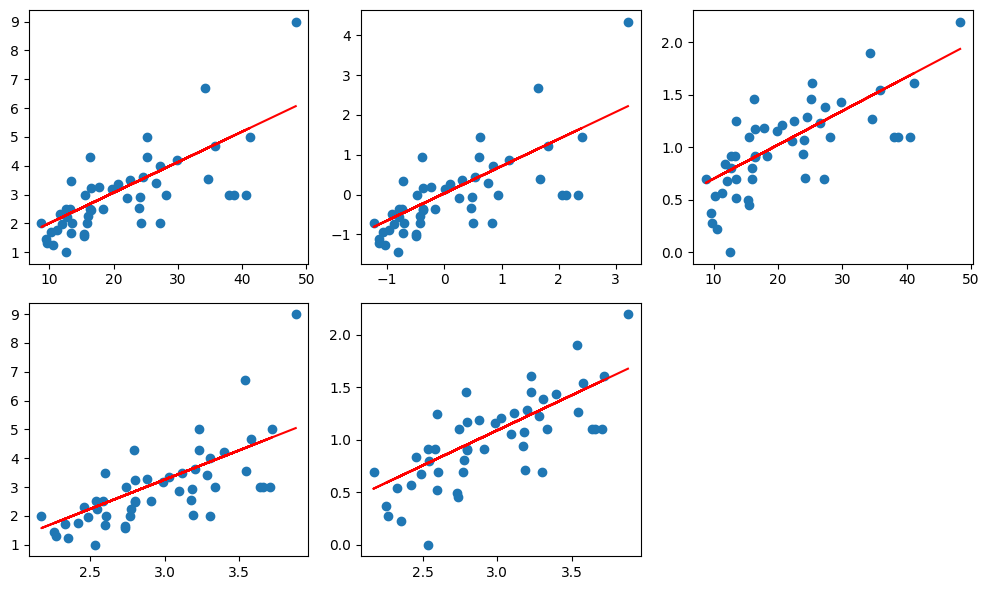

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for i in range(2):
    if i == 0:
        p = str(1)
    if i == 1:
        p = str(4)
    for j in range(3):
        if i == 1 and j == 2:
            break
        p = str(p)
        X_test = globals()['X_test' + str(p)]
        y_pred = globals()['y_pred' + str(p)]
        y_test = globals()['y_test' + str(p)]
        ax[i, j].scatter(X_test, y_test, label='y_test')
        ax[i, j].plot(X_test, y_pred, color='red', label='y_pred')
        ax[i, j].set_title(f"")
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
#         ax[i, j].grid(True)
#         ax[i, j].legend()
        p = int(p)
        p += 1

fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()


1. The above plots can't be compared because they all have variables on different scales.
    - For example, in the first plot it seems that the slope is very near 1, but in reality the slope is 0.1 which is very flat.
    - The first and the last plots can be arranged to show the true scale of regression line, but I am not doing that because the same is not possible for the other three graphs.
2. But I created them the sake of completeness of the analysis.